Implementing code from Flores paper

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [6]:
def K(R):
    '''
    (Kyner) guarantees numerical smoothness
    '''
    #return k1/(1 + k2 * (R**2)) where k1 = 1 and k2 = 100
    return 1/(1 + 100 * (R**2))

def model(y_in, t, params):
    '''
    model(y_in, t, params)
    Integrates R_e and S_e
    '''
    
    if params is None:
        a=0.85
        b=0.3
        c=0.8
        d=0.5
        L=0
        K=1
        C=1
        R=3
        S=4
        
    else:        
        a = params['a']
        b = params['b']
        c = params['c']
        d = params['d']
        L = params['L']
        K = params['K']
        C = params['C']
        R = params['R']
        S = params['S']

    #???           
    #x = y_in[0]
    #y = y_in[1]
    
    
    dRdt = R - c * S - b * (S**2) + (d - L) + K
    dSdt = R - a * S + C * S
    
    return [dRdt, dSdt]

def plot(model, a=0.85, b=0.3, c=0.8, d=0.5, L=0, K=1, C=1, R=3, S=4):
    '''
    plots dR/dt and dS/dt
    '''
    
    #fig0, ax0 = plt.subplots(1,1,figsize=(8,8)) #sets up the grid for plot
    
    t = np.linspace(0, 10, 1000) #sets up time
    
    ode_args = {'a':a,'b':b,'c':c,'d':d,'L':L,'K':K,'C':C,'R':R,'S':S} #parameters
    
    #for loop??
    for R in (0,5):
        for S in (1,6):
            
            y_out = odeint(model, [R,S], t, args = (ode_args,)) #integration
    
    plt.figure() #sets up the grid for plot
    plt.plot(y_out[:,0],y_out[:,1])
    plt.xlabel('dRdt', fontsize = 18)
    plt.ylabel('dSdt', fontsize = 18)

Things to discuss:
<br>
What are other functions besides K?
<br>
What parameters go into K?
<br>
x and y or R and S??

/Users/jessicaarzavala/opt/anaconda3/lib/python3.7/site-packages/scipy/integrate/odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


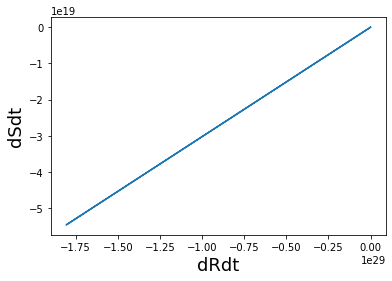

In [7]:
plot(model, a=0.85, b=0.3, c=0.8, d=0.5, L=0, K=1, C=1)